In [29]:
import math
import numpy as np
x=np.arange(0,200)
y = 2*np.sin(x/1)
y = pd.DataFrame(data=y,columns=["sin"])

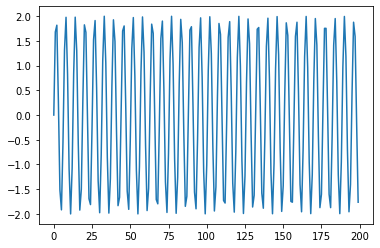

In [34]:
import matplotlib.pyplot as plt
plt.plot(y)


In [32]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(y, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=int(25/4),
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, stepwise=True)

smodel.summary()

D:\Anaconda3\envs\arima\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 6) (constant=True); AIC=-313.495, BIC=-297.156, Time=0.992 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 6) (constant=True); AIC=198.591, BIC=205.127, Time=0.149 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 6) (constant=True); AIC=-343.354, BIC=-330.282, Time=0.402 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 0, 6); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 6) (constant=True); AIC=-249.277, BIC=-236.206, Time=1.091 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 6); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 6) (constant=False); AIC=196.593, BIC=199.861, Time=0.023 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 6) (constant=True); AIC=-76.097, BIC=-63.025, Time=0.543 seconds
Near non-invertible roots for order (1, 0, 1)(0, 1, 0, 6);

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  200
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 6)   Log Likelihood                 504.413
Date:                                Mon, 23 Mar 2020   AIC                           -994.825
Time:                                        23:11:19   BIC                           -971.950
Sample:                                             0   HQIC                          -985.563
                                                - 200                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.004      0.064      0.949      -0.008       0.009
ar.L1          0.5413      0.143      3.791      0.000       0.261       0.821
ma.L1          0.9726      0.034     28.815      0.000       0.906       1.039
ar.S.L6        0.9599      0.039     24.699      0.000       0.884       1.036
ma.S.L6        1.9647      1.541      1.275      0.202      -1.055       4.985
ma.S.L12       0.9856      1.554      0.634      0.526      -2.060       4.032
sigma2         0.0002      0.000      0.650      0.516      -0.000       0.001
===================================================================================
Ljung-Box (Q):                     3075.81   Jarque-Bera (JB):                15.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.05
Prob(H) (two-sided):                  0.49   Kurtosis:                         1.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
import pandas as pd
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(y.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(y)
plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
# # plt.show()

ValueError: view limit minimum -35993.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [27]:
y.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [38]:
index_of_fc

DatetimeIndex(['1970-01-01 00:00:00.000000199',
               '1970-02-01 00:00:00.000000199',
               '1970-03-01 00:00:00.000000199',
               '1970-04-01 00:00:00.000000199',
               '1970-05-01 00:00:00.000000199',
               '1970-06-01 00:00:00.000000199',
               '1970-07-01 00:00:00.000000199',
               '1970-08-01 00:00:00.000000199',
               '1970-09-01 00:00:00.000000199',
               '1970-10-01 00:00:00.000000199',
               '1970-11-01 00:00:00.000000199',
               '1970-12-01 00:00:00.000000199',
               '1971-01-01 00:00:00.000000199',
               '1971-02-01 00:00:00.000000199',
               '1971-03-01 00:00:00.000000199',
               '1971-04-01 00:00:00.000000199',
               '1971-05-01 00:00:00.000000199',
               '1971-06-01 00:00:00.000000199',
               '1971-07-01 00:00:00.000000199',
               '1971-08-01 00:00:00.000000199',
               '1971-09-01 00:00:00.0000

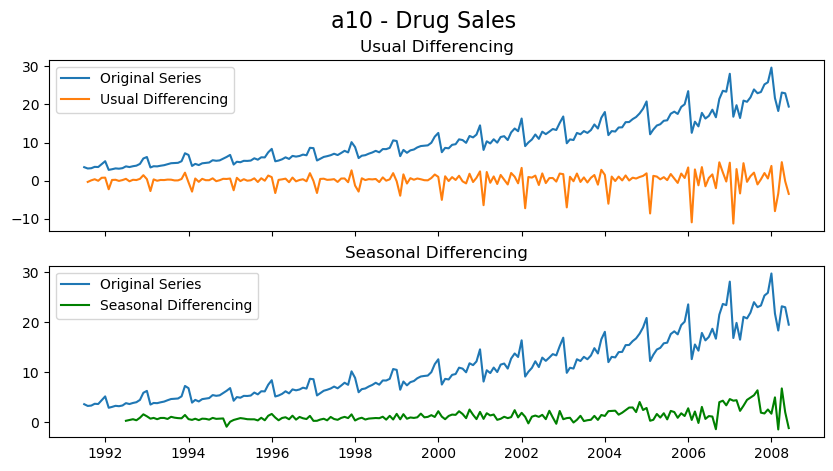

In [2]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [8]:
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [3]:
len(data)

204

In [4]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=534.818, BIC=551.105, Time=1.483 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=624.061, BIC=630.576, Time=0.036 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=596.068, BIC=609.098, Time=0.555 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=611.475, BIC=624.505, Time=0.420 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=757.274, BIC=760.532, Time=0.034 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=559.407, BIC=572.437, Time=0.355 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=554.646, BIC=574.191, Time=2.155 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=536.817, BIC=556.362, Time=5.569 seconds
Fit ARIMA: (1, 0, 1)x

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -250.092
Date:                                 Tue, 24 Mar 2020   AIC                            518.184
Time:                                         10:01:04   BIC                            547.501
Sample:                                              0   HQIC                           530.058
                                                 - 204                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.033      0.749      0.454      -0.040       0.090
ar.L1         -0.1236      0.149     -0.829      0.407      -0.416       0.169
ar.L2          0.4831      0.061      7.891      0.000       0.363       0.603
ar.L3          0.5240      0.083      6.343      0.000       0.362       0.686
ma.L1          0.1930      0.164      1.179      0.238      -0.128       0.514
ar.S.L12       0.8415      0.123      6.859      0.000       0.601       1.082
ma.S.L12      -1.6404      0.160    -10.280      0.000      -1.953      -1.328
ma.S.L24       0.8329      0.124      6.724      0.000       0.590       1.076
sigma2         0.6943      0.084      8.267      0.000       0.530       0.859
===================================================================================
Ljung-Box (Q):                       61.11   Jarque-Bera (JB):               103.78
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.74   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'SARIMA - Final Forecast of a10 - Drug Sales')

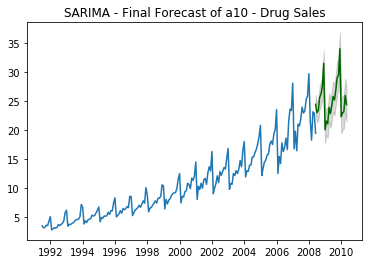

In [7]:
import pandas as pd
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
# plt.show()